In [5]:
import requests
import time
import os
import sys
import re
import io
import json
import csv
import openpyxl
import pandas as pd
import numpy as np
#import kss
import ast
#from pykospacing import spacing
from konlpy.tag import Komoran

In [97]:
#각 키워드에 해당하는 내용 정리
#예시: [매수', '민주당', '부모', '사건', '새끼', '유튜브', '의대', '자식', '친구', '한강']
from IPython.core.display import display, HTML
from konlpy.tag import Okt

#키워드에 해당하는 제목, 본문, 댓글 출력, 추후 iteration 돌며 10가지 모두 할 것
key = '민주당'

final = pd.DataFrame(columns = ['contents'])

f = pd.read_csv('루리웹_엑셀확인용.csv')

#키워드 본문, 제목, 댓글 돌며 확인
is_key = f['본문'].str.contains(key, na=False) | f['제목'].str.contains(key, na=False) | f['댓글'].str.contains(key, na=False)


f_key = f[is_key]
f_key = f_key.reset_index()
f_key

,index,제목,본문,댓글
0,0,모노리서치 김경수 차기 경남지사 지지율 위,재판만 잘 되면 재선 충분히 가능,도정 지지율 프로 정도 나오던데 경남 분위기 생각하면 대단함정말 김경수가 민주당에서...
1,3,신동근 우리 민주당이 언제부터 부자들을 위한 정당이었지,NaN,민주당 내부에 카르텔 벌레들이 생각보다 엄청나게 많은듯 이거 수술실 문제나 해결할...
2,4,윾승민 아직도 조국 찬양하는 민주당 한심하다,네 다음 진짜로 청탁주려다 걸린 찐따,박근혜 가방모찌친구 아들이 당대표 예비경선 위로 통과하니 의기양양그네 명박이 아직도...
3,8,르포 준석이가 당대표 되나요 노원 상계동 말 들어보니,초선도 아닌 선 이준석각종 여론조사서중진들 제쳐이 후보 고향 노원 상계동 청년들 기...,노원역 인근 택시 승강장에서 만난 대 남성 택시기사는 자신의 정치성향을 보수라고 밝...
4,34,김남국 황,이런 미친 새가,저쪽이랑 친목질이라니 그냥 네 감사합니다나 선거 건승하세요 정도만 적는게 정상같은데...
5,39,이준석 민주당이 윤석열 처가로 공격할 때 대응법 있다,일단 윤석열이 우리 당에 와야 해 그럼 비책이 담긴 비단주머니를 개 줄게그걸로 충분...,이 기사 핵심은 민주당이나 이준석보단 윤씨 처가네제목만으로도 뭔가 처가에 문제가 있...
6,40,조국의 시간 차트 올킬이네,하 이런데도 손절해야 한다던 그놈의 여론 대변자들 오히려 남은 년 안에 명예회복을 ...,멍청이들이지들 찍어주는사람들연론은 무시하고엉뚱한것들이 씨부리는거에동조하면어쩌자는거야...
7,79,조국 전 장관 회고록에 초선족 반응,NaN,자서전 아니고 회고록이라고 븅신들아 장담컨데 내년 대선에 만약에 이재명이 최종후보되...


In [98]:
final_key = pd.DataFrame(columns = ['tokenized'])
komoran = Komoran()

for i in range(len(f_key)):
    try:
        st = f_key.loc[i, '제목']
        final_key.loc[i, 'tokenized'] = str(st)
        ct = f_key.loc[i, '본문']
        final_key.loc[i, 'tokenized'] += str(ct)
        
        cm = f_key.loc[i, '댓글']
        #str Concatenation 문제 발생시 주석처리한 부분처럼 str() 처리하면 해결 가능
        #final_key.loc[i, 'tokenized'] += cm
        final_key.loc[i, 'tokenized'] += str(cm)
        
    except KeyError:
        print("error")

keyword_content = pd.DataFrame(columns = ['content','positive', 'negative', 'neutral'])


for i in range(len(final_key)):
    try:
        fc = final_key.loc[i, 'tokenized']#.replace(" ", "")
        #fc = spacing(fc)
        #fc = str(komoran.morphs(fc))
        
        if i == 0:
            keyword_content.loc[0,'content'] = fc
        else:
            keyword_content.loc[0,'content'] += fc
        
    except KeyError:
        print("error")

keyword_content

,content,positive,negative,neutral
0,모노리서치 김경수 차기 경남지사 지지율 위재판만 잘 되면 재선 충분히 가능도정 지...,NaN,NaN,NaN


In [99]:
# 감성사전에서 감성분석
f = open('SentiWord_Dict.txt', 'r', -1, 'utf-8')
lines = f.readlines()

score_dict = []

for line in lines:
    line_splited = line.split()
    score = int(line_splited[-1])
    word = ''
    for frac in line_splited[:-1]:
        word = word + ' ' + frac
    
    word = word[1:]
    score_dict.append([word, score])

In [100]:
#keys = []

keyword_content['positive'] = 0
keyword_content['negative'] = 0
keyword_content['neutral'] = 0

#komoran = Komoran()
#keys = spacing(keyword_content.loc[0, 'content'])
#keys = = str(komoran.nouns(keys)

#keyword_content.loc[0, 'content'] = spacing(keyword_content.loc[0, 'content'])
keyword_content.loc[0, 'content'] = str(komoran.nouns(keyword_content.loc[0, 'content']))


stopwords = ['하다', '없다', '있다', '되다', '아니다', '같다', '이다', '않다', '그렇다', 
             '이렇다', '싶다', '다', '것', '그', '이', '거', '니다']


pos_list = ast.literal_eval(keyword_content.loc[0, 'content'])
    
final = []
    
for j in range(len(pos_list)):
    if pos_list[j] not in stopwords:
        final.append(pos_list[j])
    
keyword_content.loc[0, 'content'] = str(final)
#keys = str(final)

In [101]:
keyword_content.insert(0, "Keyword", key)

In [102]:
#keyword_content.head()

In [103]:
#tokens.append(keyword_content.loc[0, 'content'])
#tokens.extend(keys)

tokens = ast.literal_eval(keyword_content.loc[0, 'content'])

try:
    for token in tokens:
        for dict_word in score_dict:
            if dict_word[0] == token:
                if dict_word[1] > 0:
                    keyword_content.loc[0, 'positive'] += dict_word[1]
                elif dict_word[1] < 0:
                    keyword_content.loc[0, 'negative'] += dict_word[1]
                else:
                    keyword_content.loc[0, 'neutral'] += 1 #중립어는 개수 세기    
except KeyError:
    print("error")

In [104]:
keyword_content[keyword_content.columns.difference(['content'])]

,Keyword,negative,neutral,positive
0,민주당,-47,0,39


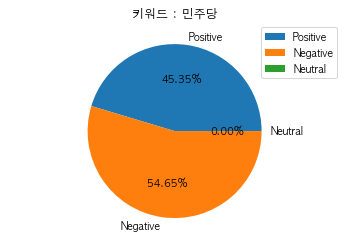

In [105]:
#% 시각화
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

#한글 꺠짐 처리
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False
pos = keyword_content.loc[0, 'positive']
neg = str(keyword_content.loc[0, 'negative']).replace("-", "")
neu = keyword_content.loc[0, 'neutral']

size = [pos, neg, neu]

label = ['Positive','Negative','Neutral']

plt.axis('equal')
plt.pie(x=size, labels=label, autopct='%.2f%%')

plt.title("키워드 : " + key)
plt.legend(loc="upper right")
plt.show()